### **Question 3.(a)**

3.(a) Coding Exercise: https://archive.ics.uci.edu/ml/datasets/Secondary+Mushroom+Dataset

i. Visualize the data set.

ii. Impute the missing values.

iii. Check correlation among the predictor variables and point out the redundant predictor variables if
any.

iv. Handle categorical variables using one-hot encoding or dummy encoding.

**i. Visualize the data set.**

In [104]:
#importing libraries and loading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp
#import requests, zipfile


In [105]:
df_mushroom = pd.read_csv('/content/secondary_data.csv',sep=';')
df_mushroom_original = df_mushroom
df_mushroom.head(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
5,p,15.34,x,g,o,f,e,NaN,w,17.84,...,s,y,w,u,w,t,p,NaN,d,u
6,p,14.85,f,h,o,f,e,NaN,w,17.71,...,s,y,w,u,w,t,g,NaN,d,w
7,p,14.86,x,h,e,f,e,NaN,w,17.03,...,s,y,w,u,w,t,p,NaN,d,u
8,p,12.85,f,g,o,f,e,NaN,w,17.27,...,s,y,w,u,w,t,p,NaN,d,a
9,p,13.55,f,g,e,f,e,NaN,w,16.04,...,s,y,w,u,w,t,p,NaN,d,w


Finding the standard statistical description of data

In [106]:
df_mushroom.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


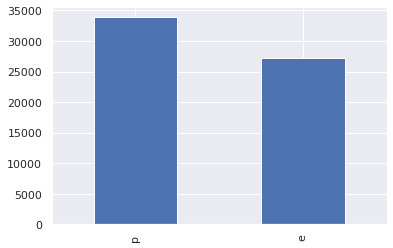

In [107]:
# It gives the information of value counts in the column class 
df_mushroom['class'].value_counts().plot(kind='bar');

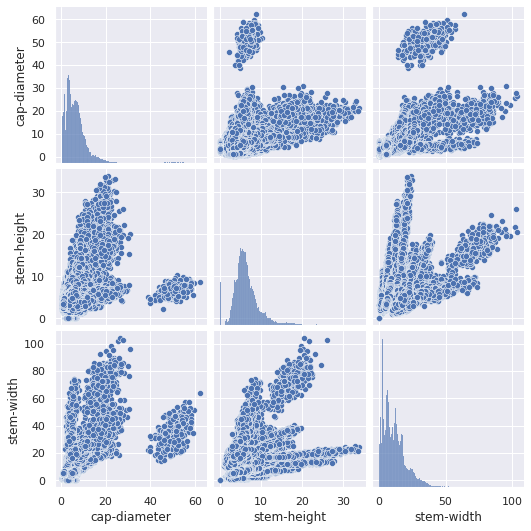

In [108]:
# scatter plot matrix shows the pairwise relationship between different types of variables
sns.pairplot(df_mushroom)
plt.show()

In [109]:
df_mushroom.isnull().any()
#to check how many values are missing values in each column of dataset .any() can be chained if we just want to know if any element is missing in that column are not

class                   False
cap-diameter            False
cap-shape               False
cap-surface              True
cap-color               False
does-bruise-or-bleed    False
gill-attachment          True
gill-spacing             True
gill-color              False
stem-height             False
stem-width              False
stem-root                True
stem-surface             True
stem-color              False
veil-type                True
veil-color               True
has-ring                False
ring-type                True
spore-print-color        True
habitat                 False
season                  False
dtype: bool

In [110]:
df_mushroom.isnull().sum()
#we found null values in the data so need to clear so that we can perform operations

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [111]:
df_mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [112]:
df_mushroom["class"].value_counts()
#number of poisnous mushroom is 33888
#number of edible mushroom is 27181

p    33888
e    27181
Name: class, dtype: int64

### **ii.Imputing the missing values**

 I have used label encoder to tranform non numeric values to numeric values. It actually normalizes labels

In [113]:
from sklearn.preprocessing import LabelEncoder
#converts non-numeric values to numeric values
for column in df_mushroom.columns:
    df_mushroom[column] = LabelEncoder().fit_transform(df_mushroom[column])


In [114]:
#checking value count once again to confirm there are no null values
df_mushroom.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [115]:
df_mushroom_original.shape

(61069, 21)

### **iii. Correlation among variables**

In [116]:
#As class is the result not a feature so dropping class column before performing correlation
modified_df_mushroom = df_mushroom.drop("class",axis=1)

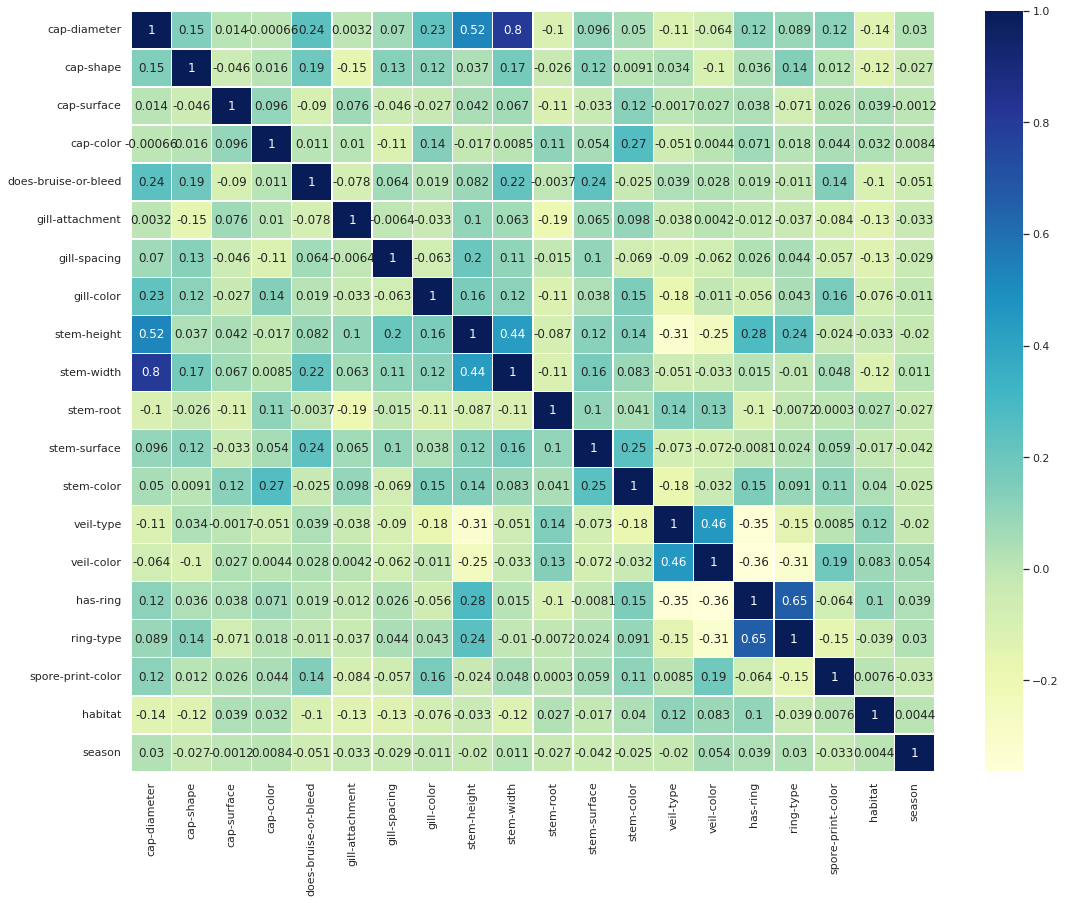

In [117]:
plt.figure(figsize=(18,14))#defining the size of figure
sns.set_theme() 
correlation = modified_df_mushroom.corr() #finding the correlation of mushroom dataframe
sns.heatmap(correlation,annot=True,linewidths=.4,cmap="YlGnBu") #Heatmap is the shading coloured matrix used for better visualization of data

### Iam taking the correlation threshold value as 0.4

### **>>>**  "cap-diameter" is the redundant feature as it is highly correlated with stem_height and stem_width

### **>>>**  "stem_height" is the redundant feature as it is highly correlated with cap-diameter and stem_width

### **>>>**  "has-ring" is the redundant feature as it is highly correlated with ring-type

### **>>>**  "ring-type" is the redundant feature as it is highly correlated with has-ring



## **iv. Handle categorical variables using one-hot encoding or dummy encoding**

In [118]:
#applying one hot encoding on original dataframe and checking the null values again after performing encoding
one_hot_encoded_df = pd.get_dummies(df_mushroom_original, columns =df_mushroom_original.columns )
one_hot_encoded_df.isnull().sum()

class_0           0
class_1           0
cap-diameter_0    0
cap-diameter_1    0
cap-diameter_2    0
                 ..
habitat_7         0
season_0          0
season_1          0
season_2          0
season_3          0
Length: 9554, dtype: int64

# Question 3(b)

3.(b) Coding Exercise: dataset: https://archive.ics.uci.edu/ml/datasets/glass+identification

i. Visualize the data-set.

ii. • After the necessary data preparation, make a logistic regression model to predict the target
variable.

• Report the accuracy and other metrics of the model (like precision, recall, F1 score).

• Which metric do you think is more relevant here? Explain.

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [120]:
#opening the file and the data being read
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',names =['Id','RI','Na','Mg','AI','Si','K','Ca','Ba','Fe','Type'])
df = df.drop('Id',axis=1) # removing Id column as it is redundant
df

,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [121]:
df.dtypes #finding the datatypes of all the features

RI      float64
Na      float64
Mg      float64
AI      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [122]:
# taking all the features by excluding type column
features = df.columns[0:-1].tolist()
features

['RI', 'Na', 'Mg', 'AI', 'Si', 'K', 'Ca', 'Ba', 'Fe']

## **Visualization of data**

In [123]:
#Finding the statistics of dataset
df.describe()


,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


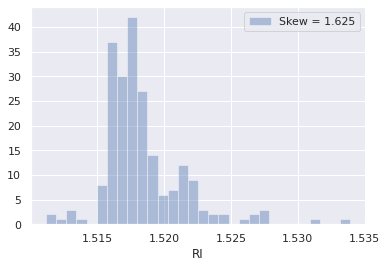

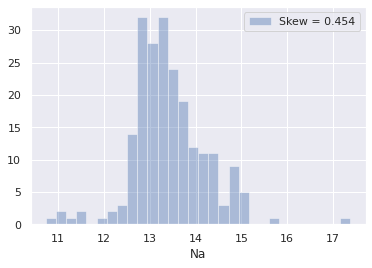

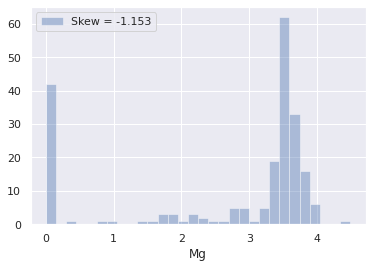

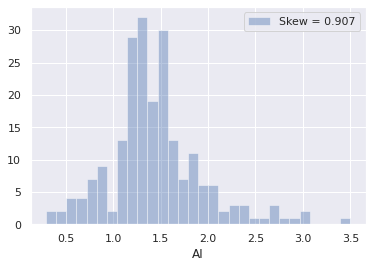

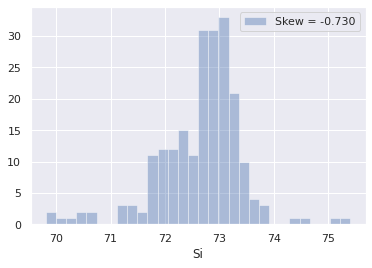

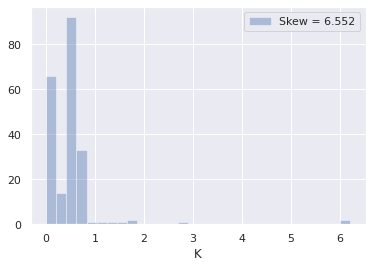

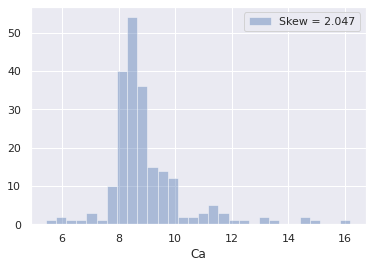

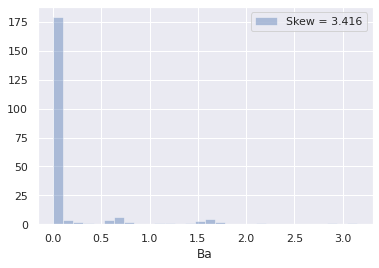

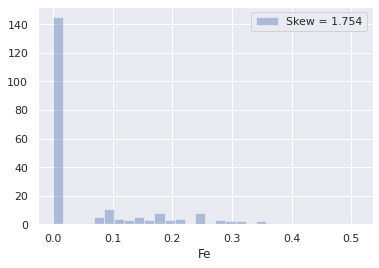

In [124]:
# visualizing the data as a distribution using displot(univariate plot)
for feature in features:
  skew = df[feature].skew()
  sns.distplot(df[feature],kde=False,label ='Skew = %.3f' %(skew),bins=30)
  plt.legend(loc = 'best')
  plt.show() #Features Fe, Ba, Ca and K has high skew coefficient

Features Fe, Ba, Ca and K has high skew coefficient


<Figure size 576x576 with 0 Axes>

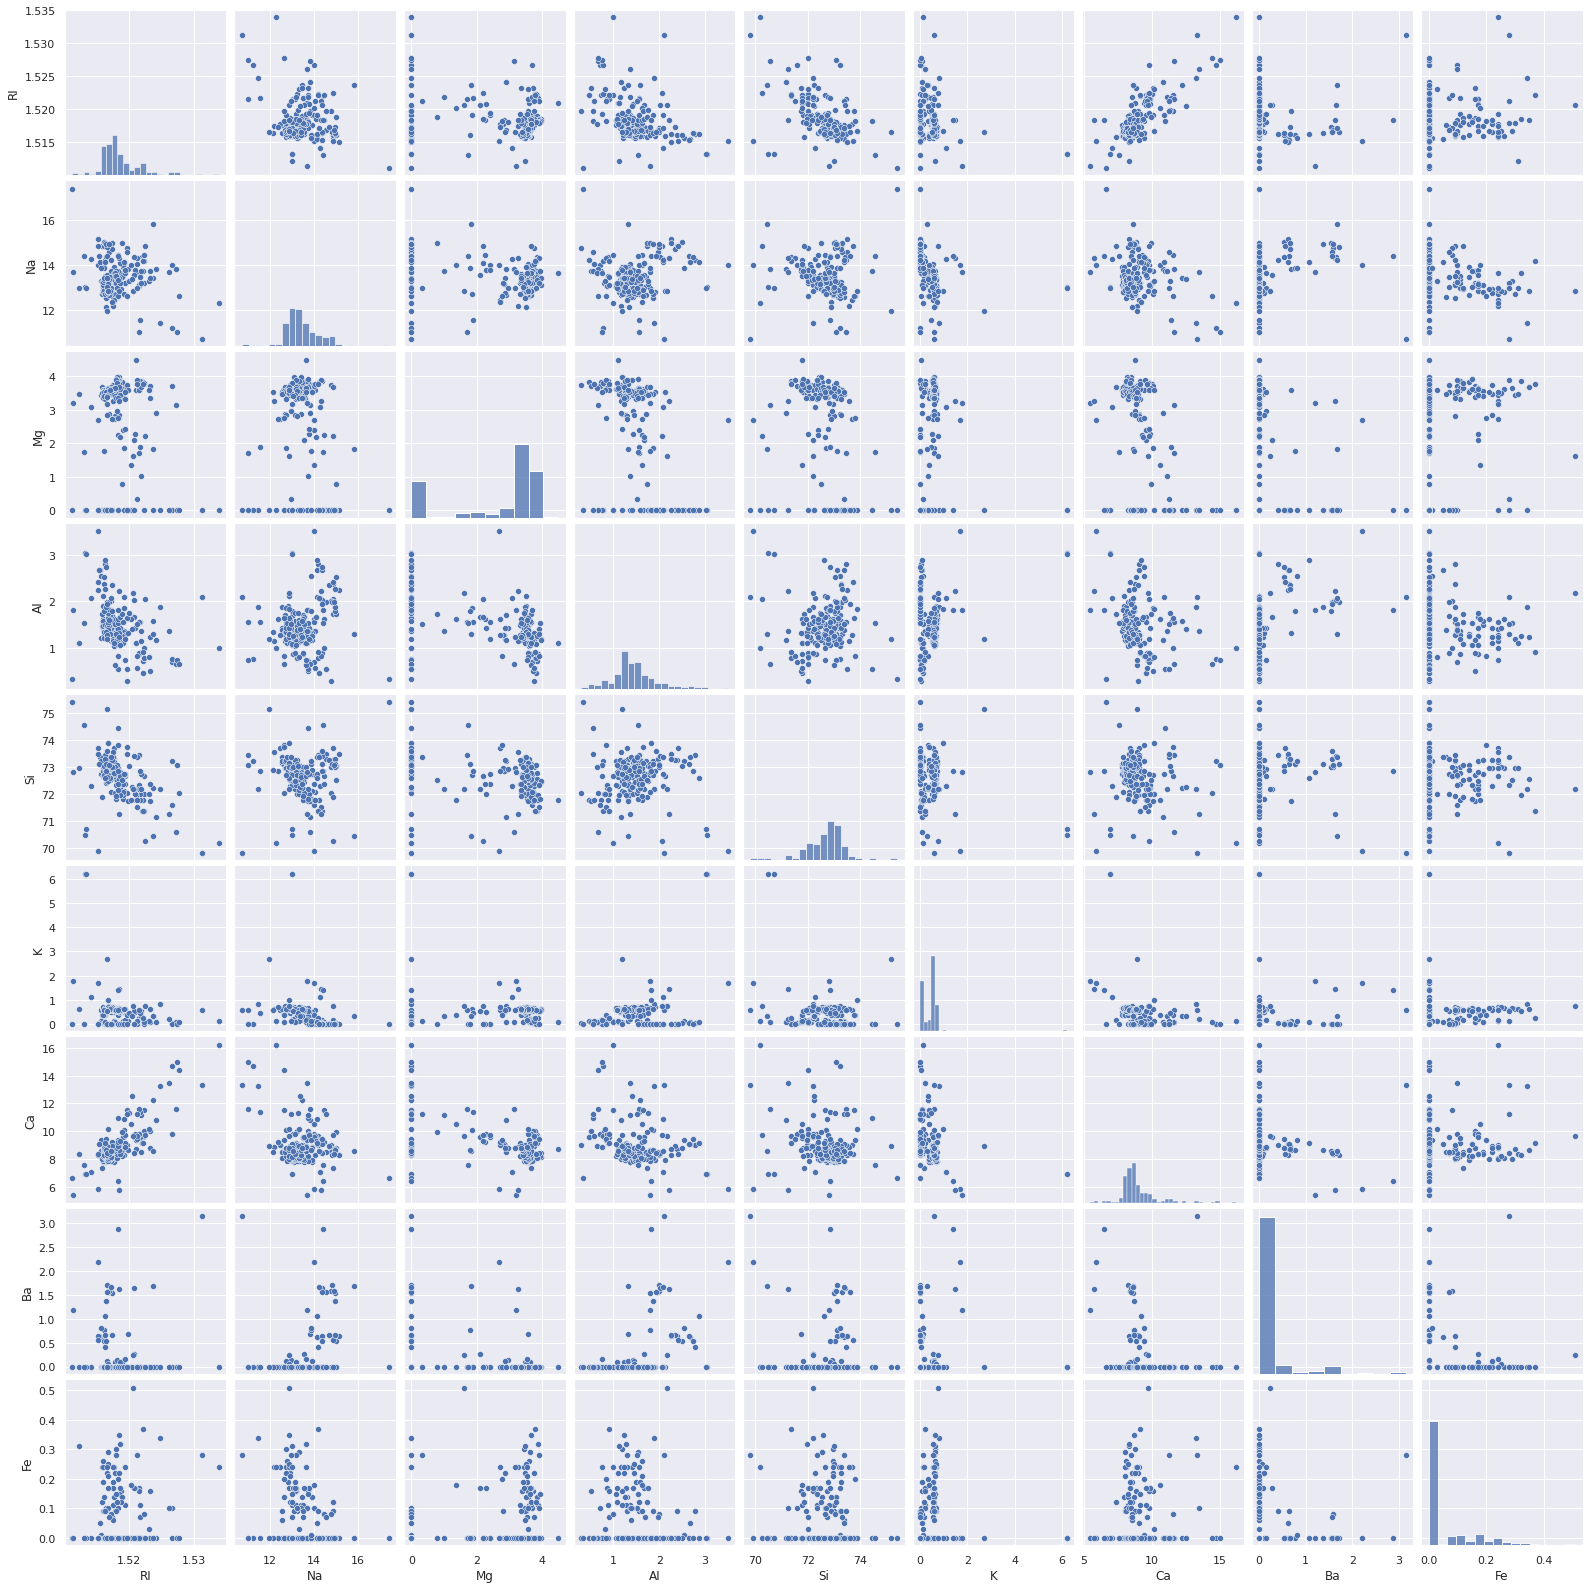

In [125]:
#Scatter plots gives relationship between variables and use dots for representing the relationship(correlation) between features
plt.figure(figsize=(8,8))
sns.pairplot(df[features],palette='deep') # features are the univarites for which scatter plot is drawn and palette is the colour
plt.show()

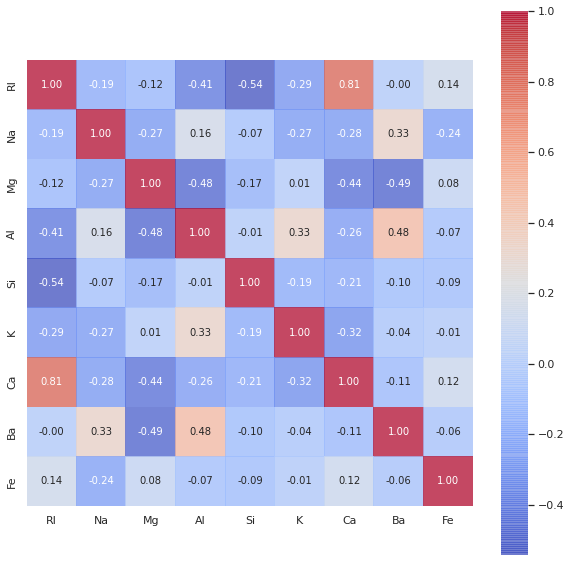

In [126]:
#Heatmap which shows more about how the features are realted among each other
#we can see that there is strong correlation between RI(refractive index) and Ca(Calcium)

corr = df[features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt = '.2f', 
            annot_kws = {'size':10}, xticklabels = features, yticklabels = features, 
            alpha = 0.7, cmap = 'coolwarm')
plt.show()

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   AI      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [128]:
#finding the value count of type of glass Type2 glass has the highest count
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

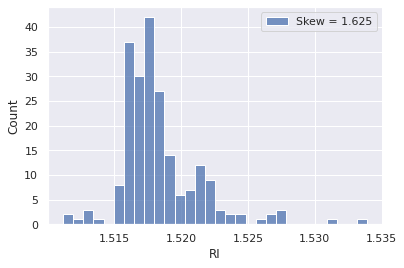

In [129]:
#from the displot above we have seen that glasses with refractive index approximately between 1.516 and 1.518 is the maximum.

skew = df['RI'].skew()
sns.histplot(df['RI'],kde=False,label ='Skew = %.3f' %(skew),bins=30)
plt.legend(loc = 'best')
plt.show()

## **Finding Logistic Regression** 

In [130]:
x_train, x_test, y_train, y_test = train_test_split(df[features],df['Type'],test_size =0.2,random_state =7)

In [131]:
a = df
b =df['Type']

In [132]:
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.3, random_state=7)
logisticreg = LogisticRegression()
logisticreg.fit(x_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [134]:
print("intercept b0 is :")
print( logisticreg.intercept_)
print("The coefficient b1= ")
print(logisticreg.coef_)

intercept b0 is :
[-0.00071196  0.00617578  0.00288095  0.01163868 -0.01326395 -0.0067195 ]
The coefficient b1= 
[[-1.07338108e-03 -3.68398481e-01  9.88526639e-01 -7.26713568e-01
   1.67444285e-01 -1.71209677e-01  3.08922986e-01 -1.74416531e-01
  -2.00452061e-02 -4.91583511e+00]
 [ 1.02702446e-02 -2.03725781e-01 -1.22051697e-01  4.18715035e-01
   1.04399010e-01  1.59126429e-01  1.68526972e-01 -2.19465274e-01
   1.79345081e-01 -1.13947687e+00]
 [ 1.62516600e-03 -2.06450331e-01  1.03287426e+00 -4.56657017e-01
  -1.69292566e-02 -1.64003619e-01  1.80540773e-01 -1.88351706e-01
  -1.27287484e-01  9.42290706e-01]
 [ 1.40726614e-02 -2.38443806e-01 -8.98398911e-01  8.02883497e-01
   2.91763118e-02  6.66738534e-01  1.03051805e-01  4.02775698e-01
   9.01381984e-02  6.89716498e-01]
 [-1.90337823e-02  8.66858526e-01 -2.79672441e-01 -2.10766247e-01
  -1.59044425e-01 -7.01023277e-01 -1.86826329e-01 -3.51733786e-01
  -9.36473461e-02  1.33515532e+00]
 [-5.86090858e-03  1.50159872e-01 -7.21277853e-01  1

In [135]:
y_predicted= logisticreg.predict(x_test)
print(y_predicted)

[2 1 2 1 1 1 2 1 1 2 1 2 2 2 2 3 3 5 2 2 2 5 2 7 2 6 7 3 2 2 7 2 1 2 2 7 2
 1 2 1 2 7 5 2 2 7 1 5 1 1 1 1 2 1 3 2 1 1 2 2 2 1 1 7 2]


In [136]:
print(df["Type"].unique())

[1 2 3 5 6 7]


**Six types of glasses are present which are belonging to Type1,2,3,5,6,7; so we have a confusion matrix of order 6x6**

TP = True positive
TN = True negative
FP= False positive
FN = False negative

**For Type1 glass :**
TP= 11, TN=39, FP= 5, FN=4

**For Type2 glass :**
TP= 11, TN=39, FP= 5, FN=4

**For Type3 glass**: TP=0, TN=54, FP= 0, FN=7
other three classes follows the same

In [137]:
from sklearn.metrics import confusion_matrix
Confn_matrix = confusion_matrix(y_test, y_predicted)
print(Confn_matrix) #for classification problem confusion matrix gives the performance measure

[[20  0  0  0  0  0]
 [ 0 28  0  1  0  0]
 [ 0  1  3  0  0  0]
 [ 0  0  1  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  7]]


### **Classification report**

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))# It measures how good the predictions are made we can directly genereate it by using inbuilt function

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       0.97      0.97      0.97        29
           3       0.75      0.75      0.75         4
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         7

    accuracy                           0.95        65
   macro avg       0.91      0.91      0.91        65
weighted avg       0.95      0.95      0.95        65



In [142]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

f1score = f1_score(y_test,y_predicted,average='macro')
print("f1_score is:",f1score)

precision = precision_score(y_test,y_predicted,average='macro')
print("precision_score is:",precision)

accuracy = accuracy_score(y_test,y_predicted)
print("accuracy_score is:",accuracy)

f1_score is: 0.9109195402298851
precision_score is: 0.9109195402298851
accuracy_score is: 0.9538461538461539


### I think the most relevant metric is accuracy as it is highest value